# GMM after Autoencoder


In [1]:
import sys
import os

sys.path.append(os.path.abspath(".."))
sys.path.append(os.path.abspath("../autoencoder"))
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from GMM import GMM
from autoencoder import Autoencoder,StepLRScheduler
from covariance_types import CovarianceType
import seaborn as sns

from external_metrics import *
from internal_metrics import *


load data

In [2]:
X = pd.read_csv("../data_processed.csv").to_numpy()
Y = pd.read_csv("../data.csv")["diagnosis"].to_numpy()

In [3]:
X,Y

(array([[ 1.09609953, -2.0715123 ,  1.26881726, ...,  2.2940576 ,
          2.74820411,  1.93531174],
        [ 1.82821197, -0.35332152,  1.68447255, ...,  1.08612862,
         -0.24367526,  0.28094279],
        [ 1.5784992 ,  0.45578591,  1.56512598, ...,  1.95328166,
          1.15124203,  0.20121416],
        ...,
        [ 0.70166686,  2.04377549,  0.67208442, ...,  0.41370467,
         -1.10357792, -0.31812924],
        [ 1.83672491,  2.33440316,  1.98078127, ...,  2.28797231,
          1.9173959 ,  2.21768395],
        [-1.80681144,  1.22071793, -1.81279344, ..., -1.7435287 ,
         -0.04809589, -0.75054629]], shape=(569, 30)),
 array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
        'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
        'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
        'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
        'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', '

Initialize best GMM parameters from the GMM experiment

In [4]:
covariance_types = [CovarianceType.FULL, CovarianceType.TIED,
                    CovarianceType.DIAG, CovarianceType.SPHERICAL]
k = 2
cov_type = CovarianceType.FULL
gmm = GMM(k=k,covariance_type=cov_type,conv_limit=1e-6,max_iter=100,seed=42)


Initialize Autoencoder

In [5]:
bottle_neck = [2,5,10,15,20]

Initialize covariance types and number of clusters

## 1. Internal Validation Metrics

Append all evaluation metrics initially in a loop

epoch   1/30 : [1.012703]
epoch   2/30 : [1.004490]
epoch   3/30 : [1.002184]
epoch   4/30 : [1.001167]
epoch   5/30 : [1.000570]
epoch   6/30 : [1.000187]
epoch   7/30 : [0.999939]
epoch   8/30 : [0.999684]
epoch   9/30 : [0.999469]
epoch  10/30 : [0.999326]
epoch  11/30 : [0.999258]
epoch  12/30 : [0.999225]
epoch  13/30 : [0.999173]
epoch  14/30 : [0.999126]
epoch  15/30 : [0.999083]
epoch  16/30 : [0.999042]
epoch  17/30 : [0.999015]
epoch  18/30 : [0.998980]
epoch  19/30 : [0.998950]
epoch  20/30 : [0.998930]
epoch  21/30 : [0.998918]
epoch  22/30 : [0.998906]
epoch  23/30 : [0.998893]
epoch  24/30 : [0.998882]
epoch  25/30 : [0.998871]
epoch  26/30 : [0.998861]
epoch  27/30 : [0.998851]
epoch  28/30 : [0.998841]
epoch  29/30 : [0.998832]
epoch  30/30 : [0.998823]


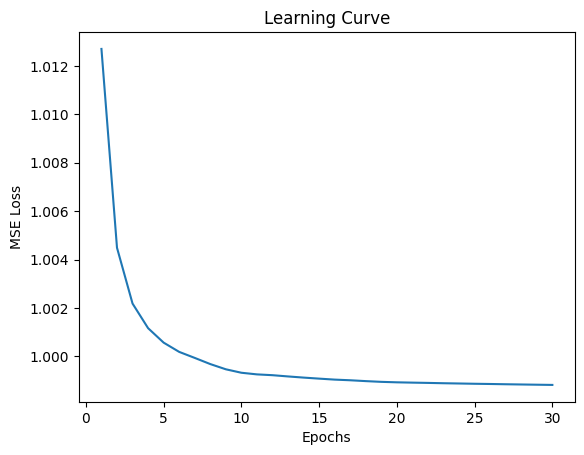

epoch   1/30 : [1.015079]
epoch   2/30 : [1.004792]
epoch   3/30 : [1.002365]
epoch   4/30 : [1.001100]
epoch   5/30 : [1.000314]
epoch   6/30 : [0.999889]
epoch   7/30 : [0.999605]
epoch   8/30 : [0.999423]
epoch   9/30 : [0.999270]
epoch  10/30 : [0.999154]
epoch  11/30 : [0.999114]
epoch  12/30 : [0.999077]
epoch  13/30 : [0.999035]
epoch  14/30 : [0.999012]
epoch  15/30 : [0.998980]
epoch  16/30 : [0.998949]
epoch  17/30 : [0.998917]
epoch  18/30 : [0.998892]
epoch  19/30 : [0.998867]
epoch  20/30 : [0.998844]
epoch  21/30 : [0.998831]
epoch  22/30 : [0.998820]
epoch  23/30 : [0.998810]
epoch  24/30 : [0.998801]
epoch  25/30 : [0.998791]
epoch  26/30 : [0.998781]
epoch  27/30 : [0.998773]
epoch  28/30 : [0.998764]
epoch  29/30 : [0.998755]
epoch  30/30 : [0.998746]


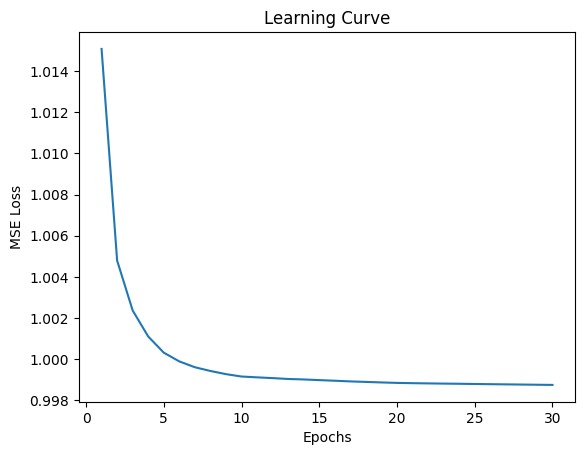

epoch   1/30 : [1.018137]
epoch   2/30 : [1.005843]
epoch   3/30 : [1.002942]
epoch   4/30 : [1.001571]
epoch   5/30 : [1.000726]
epoch   6/30 : [1.000250]
epoch   7/30 : [0.999920]
epoch   8/30 : [0.999659]
epoch   9/30 : [0.999485]
epoch  10/30 : [0.999349]
epoch  11/30 : [0.999277]
epoch  12/30 : [0.999223]
epoch  13/30 : [0.999181]
epoch  14/30 : [0.999139]
epoch  15/30 : [0.999095]
epoch  16/30 : [0.999055]
epoch  17/30 : [0.999025]
epoch  18/30 : [0.998997]
epoch  19/30 : [0.998976]
epoch  20/30 : [0.998944]
epoch  21/30 : [0.998933]
epoch  22/30 : [0.998921]
epoch  23/30 : [0.998906]
epoch  24/30 : [0.998894]
epoch  25/30 : [0.998885]
epoch  26/30 : [0.998874]
epoch  27/30 : [0.998866]
epoch  28/30 : [0.998856]
epoch  29/30 : [0.998846]
epoch  30/30 : [0.998835]


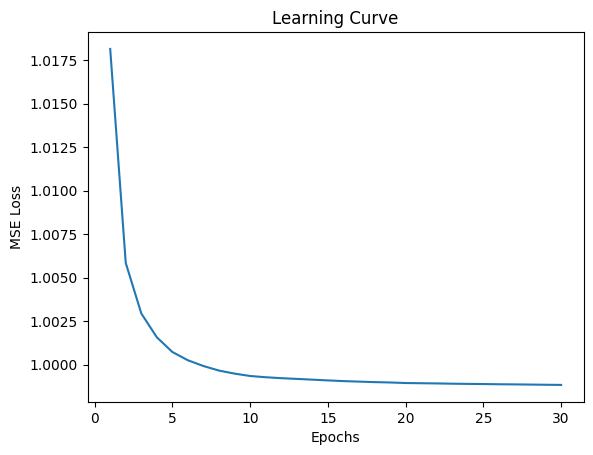

epoch   1/30 : [1.018124]
epoch   2/30 : [1.006381]
epoch   3/30 : [1.003114]
epoch   4/30 : [1.001616]
epoch   5/30 : [1.000809]
epoch   6/30 : [1.000290]
epoch   7/30 : [0.999963]
epoch   8/30 : [0.999686]
epoch   9/30 : [0.999519]
epoch  10/30 : [0.999351]
epoch  11/30 : [0.999288]
epoch  12/30 : [0.999229]
epoch  13/30 : [0.999177]
epoch  14/30 : [0.999135]
epoch  15/30 : [0.999098]
epoch  16/30 : [0.999060]
epoch  17/30 : [0.999033]
epoch  18/30 : [0.998998]
epoch  19/30 : [0.998970]
epoch  20/30 : [0.998944]
epoch  21/30 : [0.998934]
epoch  22/30 : [0.998921]
epoch  23/30 : [0.998912]
epoch  24/30 : [0.998902]
epoch  25/30 : [0.998891]
epoch  26/30 : [0.998878]
epoch  27/30 : [0.998866]
epoch  28/30 : [0.998854]
epoch  29/30 : [0.998845]
epoch  30/30 : [0.998836]


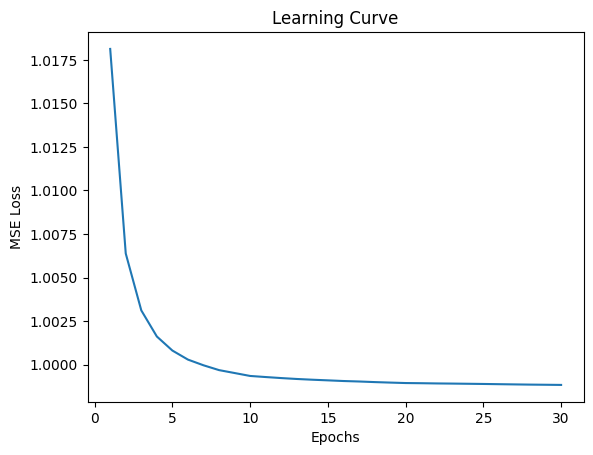

epoch   1/30 : [1.020053]
epoch   2/30 : [1.005437]
epoch   3/30 : [1.002548]
epoch   4/30 : [1.001171]
epoch   5/30 : [1.000522]
epoch   6/30 : [1.000059]
epoch   7/30 : [0.999727]
epoch   8/30 : [0.999509]
epoch   9/30 : [0.999358]
epoch  10/30 : [0.999222]
epoch  11/30 : [0.999178]
epoch  12/30 : [0.999126]
epoch  13/30 : [0.999075]
epoch  14/30 : [0.999037]
epoch  15/30 : [0.999002]
epoch  16/30 : [0.998969]
epoch  17/30 : [0.998943]
epoch  18/30 : [0.998918]
epoch  19/30 : [0.998894]
epoch  20/30 : [0.998864]
epoch  21/30 : [0.998851]
epoch  22/30 : [0.998840]
epoch  23/30 : [0.998829]
epoch  24/30 : [0.998822]
epoch  25/30 : [0.998813]
epoch  26/30 : [0.998802]
epoch  27/30 : [0.998794]
epoch  28/30 : [0.998784]
epoch  29/30 : [0.998777]
epoch  30/30 : [0.998770]


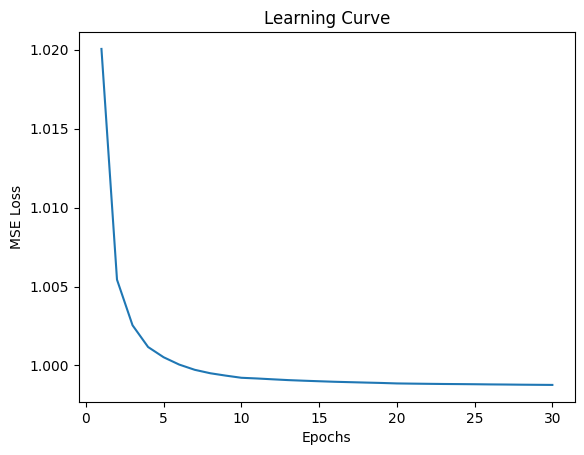

In [6]:

results = []
X_reshaped = X.reshape(-1,X.shape[1],1)
for value in bottle_neck:
    # fit
    autoencoder = Autoencoder(30,28,26,value)
    autoencoder.train(X_reshaped,X_reshaped, epochs=30, batch_size=100, eta=0.5, l2_param=0.01, lr_scheduler=StepLRScheduler(lr=0.5, step_size=10, gamma=0.5))
    autoencoder.plot_learning_curve()
    x_transformed = np.array([autoencoder.encode(x).reshape(-1) for x in X_reshaped])
    # fit gmm
    gmm.fit(x_transformed)
            # Cluster assignments
    r = gmm.r
    clusters = np.argmax(r, axis=1)
    
    # Compute metrics
    bic_score = gmm.bic(x_transformed)
    aic_score = gmm.aic(x_transformed)
    sil_score = silhouette_score(x_transformed, clusters)
    db_score = davies_bouldin(x_transformed, clusters)
    ch_score = calinski_harabasz(x_transformed, clusters)
    wcss_score = wcss(x_transformed,clusters)
    ll = gmm.compute_log_likelihood(x_transformed)
    
    # External metrics
    ari = adjusted_rand_index(Y, clusters)
    nmi = normalized_mutual_info(Y, clusters)
    purity = purity_score(Y, clusters)
    
    # Binary classification metrics
    binary_metrics = compute_binary_metrics(Y, clusters, positive_class='M')
    
    # Store results
    results.append({
        "Bottle Neck Values": value,
        "BIC": bic_score,
        "AIC": aic_score,
        "Silhouette": sil_score,
        "Davies-Bouldin": db_score,
        "Calinski-Harabasz": ch_score,
        "WCSS":wcss_score,
        "Log-Likelihood": ll,
        "ARI": ari,
        "NMI": nmi,
        "Purity": purity,
        "Accuracy": binary_metrics['accuracy']
    })

df_metrics = pd.DataFrame(results)

Get the best model

In [7]:
best_bic_row = df_metrics.loc[df_metrics['BIC'].idxmin()]
best_val = int(best_bic_row['Bottle Neck Values'])
# Fit best model
autoencoder = Autoencoder(30,28,26,best_val)
autoencoder.train(X_reshaped,X_reshaped, epochs=30, batch_size=100, eta=0.5, l2_param=0.01, lr_scheduler=StepLRScheduler(lr=0.5, step_size=10, gamma=0.5))
x_transformed = np.array([autoencoder.encode(x).reshape(-1) for x in X_reshaped])
gmm.fit(x_transformed)
# Cluster assignments
r = gmm.r
clusters = np.argmax(r, axis=1)

# Map clusters to true classes for interpretability
mapped_clusters = map_clusters_to_labels(clusters, assign_clusters_to_classes(Y, clusters))


epoch   1/30 : [1.020053]
epoch   2/30 : [1.005437]
epoch   3/30 : [1.002548]
epoch   4/30 : [1.001171]
epoch   5/30 : [1.000522]
epoch   6/30 : [1.000059]
epoch   7/30 : [0.999727]
epoch   8/30 : [0.999509]
epoch   9/30 : [0.999358]
epoch  10/30 : [0.999222]
epoch  11/30 : [0.999178]
epoch  12/30 : [0.999126]
epoch  13/30 : [0.999075]
epoch  14/30 : [0.999037]
epoch  15/30 : [0.999002]
epoch  16/30 : [0.998969]
epoch  17/30 : [0.998943]
epoch  18/30 : [0.998918]
epoch  19/30 : [0.998894]
epoch  20/30 : [0.998864]
epoch  21/30 : [0.998851]
epoch  22/30 : [0.998840]
epoch  23/30 : [0.998829]
epoch  24/30 : [0.998822]
epoch  25/30 : [0.998813]
epoch  26/30 : [0.998802]
epoch  27/30 : [0.998794]
epoch  28/30 : [0.998784]
epoch  29/30 : [0.998777]
epoch  30/30 : [0.998770]


Plot the best model

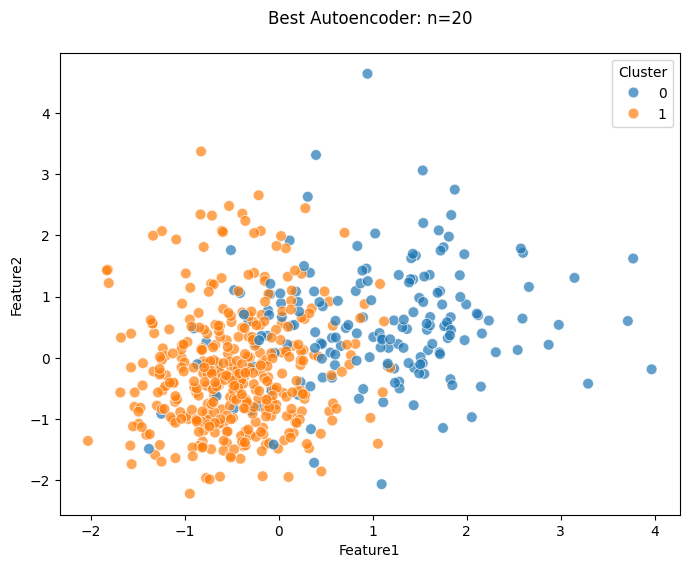

In [8]:
df_clusters = pd.DataFrame({
    'Feature1': X[:,0],
    'Feature2': X[:,1],
    'Cluster': clusters.astype(str)
})

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_clusters,
    x='Feature1',
    y='Feature2',
    hue='Cluster',
    palette='tab10',
    s=60,
    alpha=0.7
)
plt.title(f"Best Autoencoder: n={best_val}\n")
plt.show()


Plot each metric

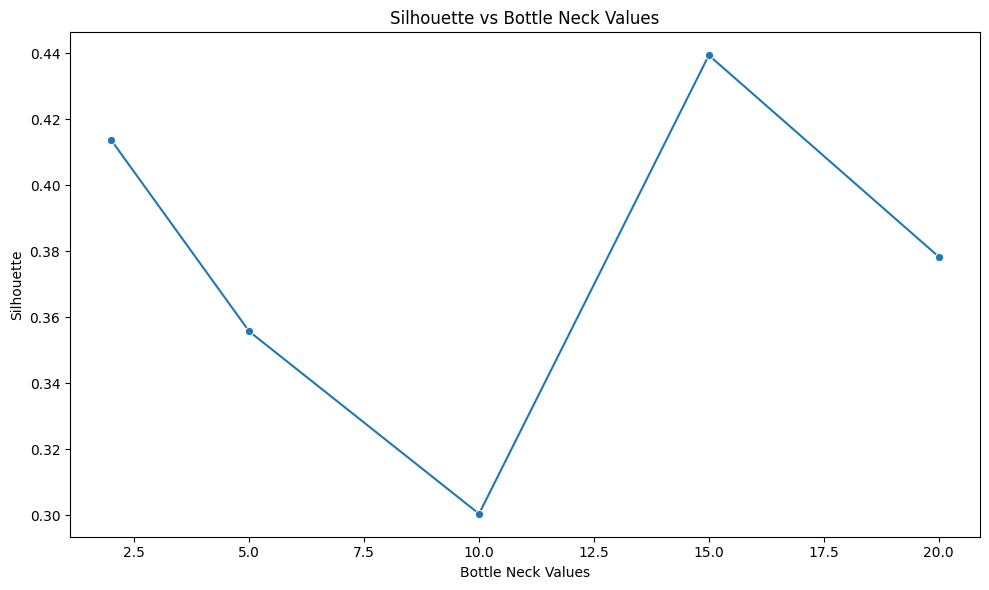

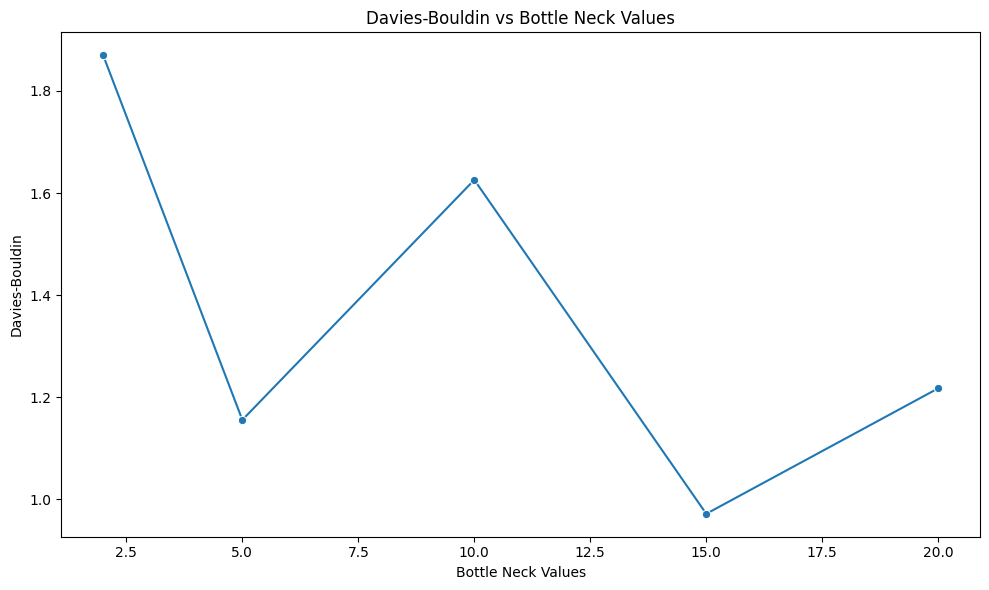

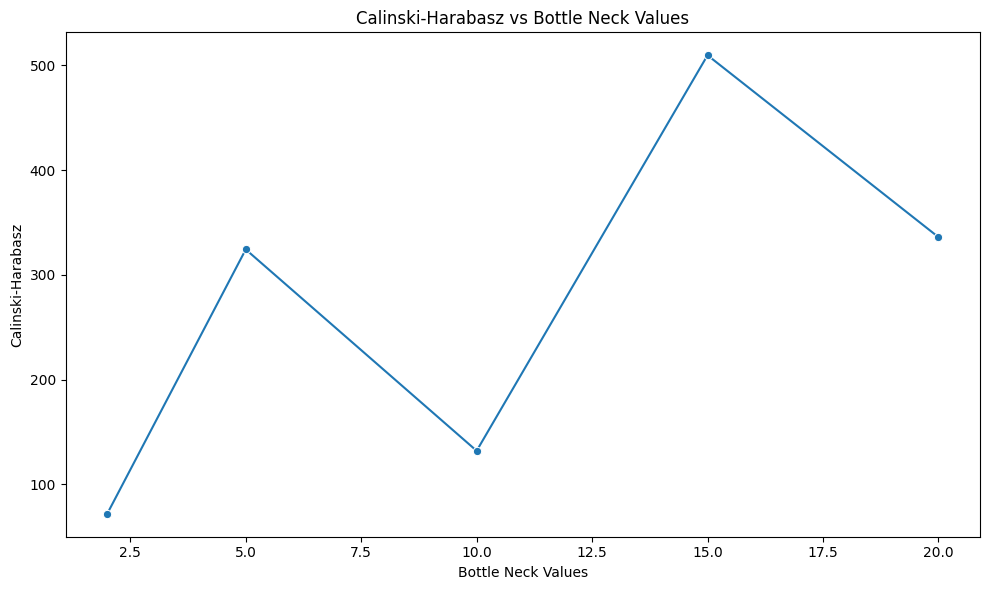

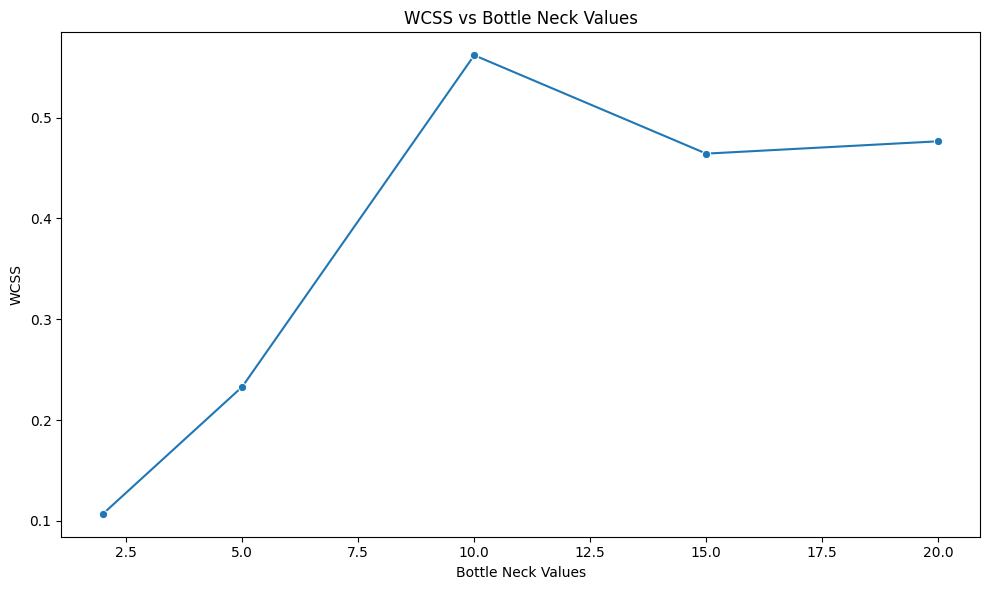

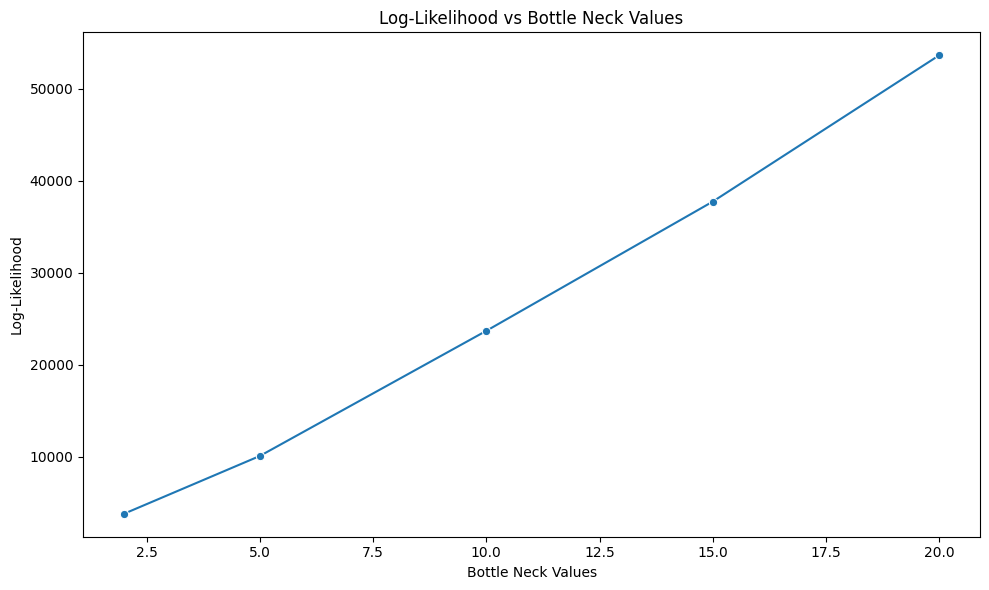

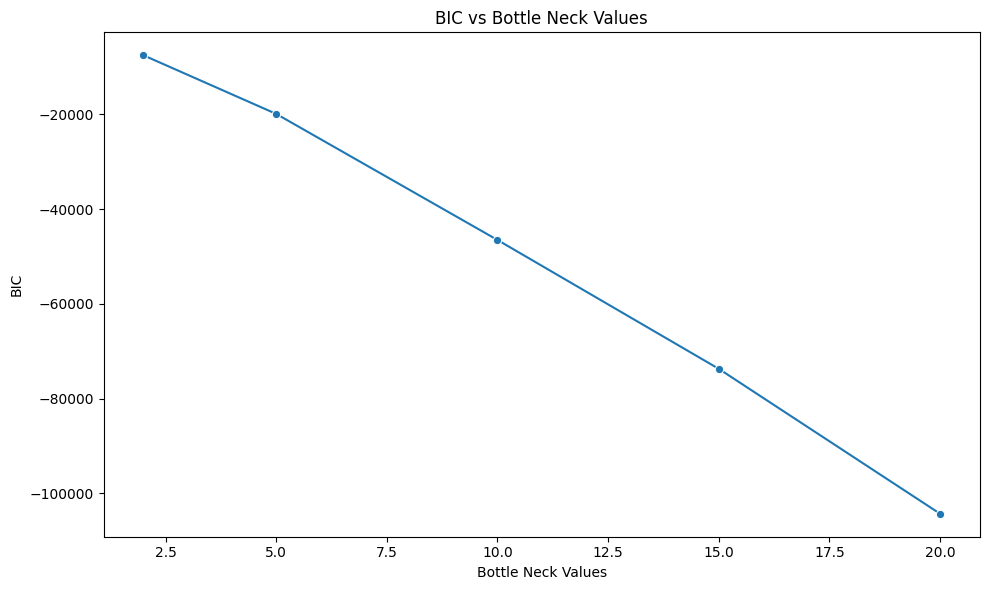

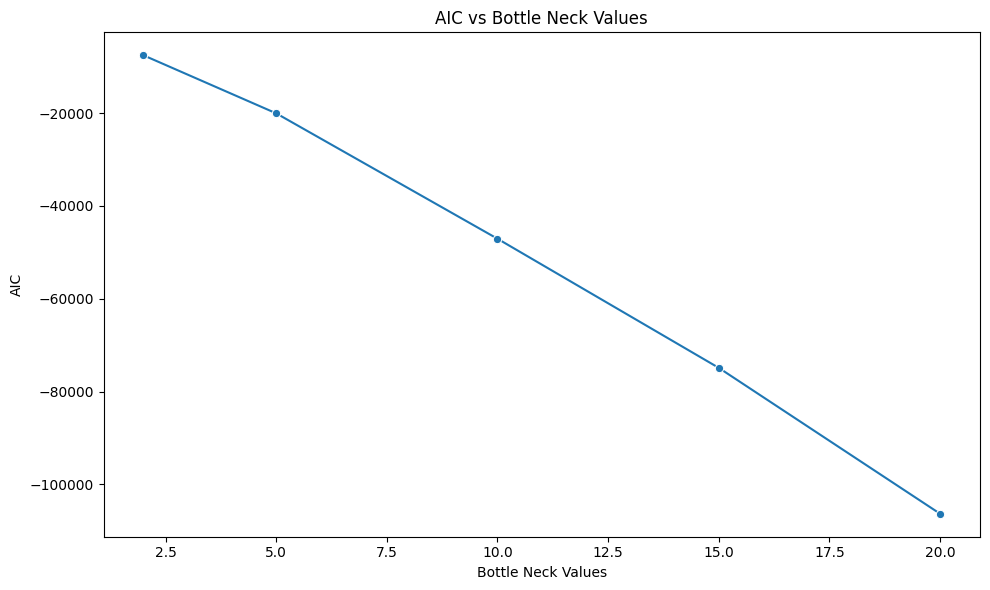

In [9]:

metrics_to_plot = [
    "Silhouette", "Davies-Bouldin", "Calinski-Harabasz","WCSS","Log-Likelihood",
    "BIC", "AIC"
]

for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))

    sns.lineplot(
        data=df_metrics,
        x="Bottle Neck Values",
        y=metric,
        marker="o"
    )

    plt.title(f"{metric} vs Bottle Neck Values")
    plt.xlabel("Bottle Neck Values")
    plt.ylabel(metric)
    plt.tight_layout()
    plt.show()


## 2. External Validation Metrics

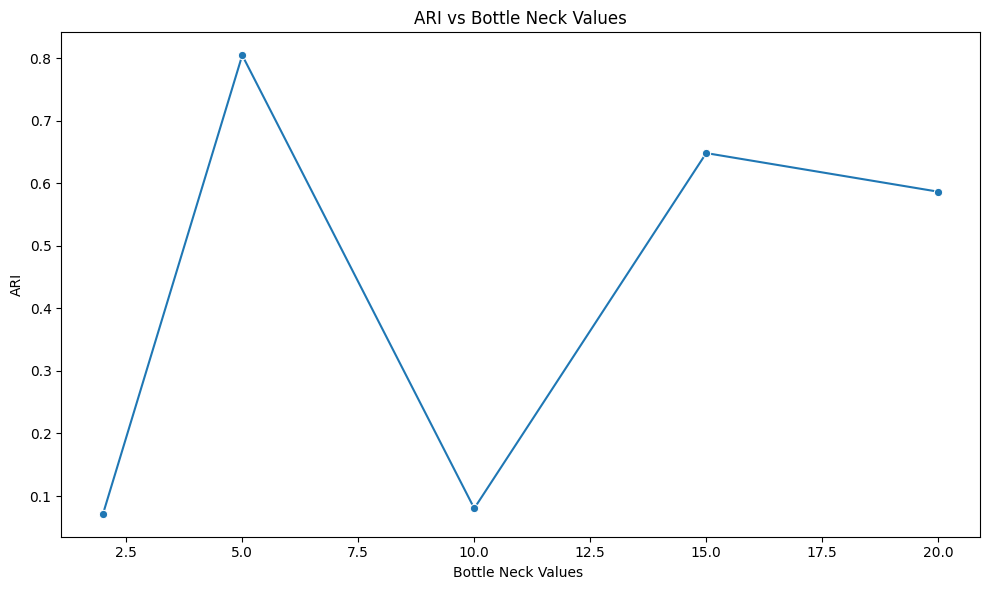

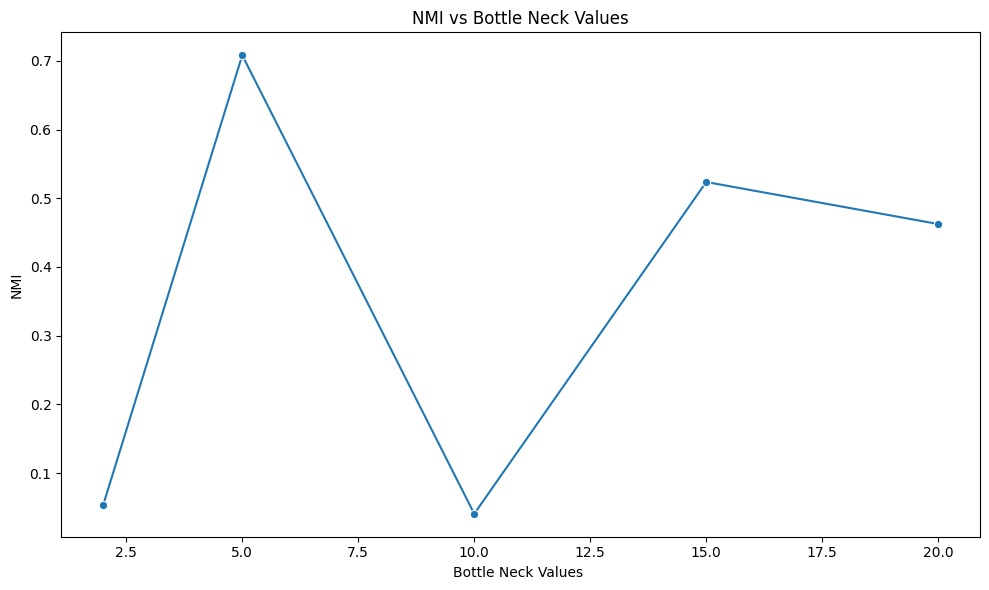

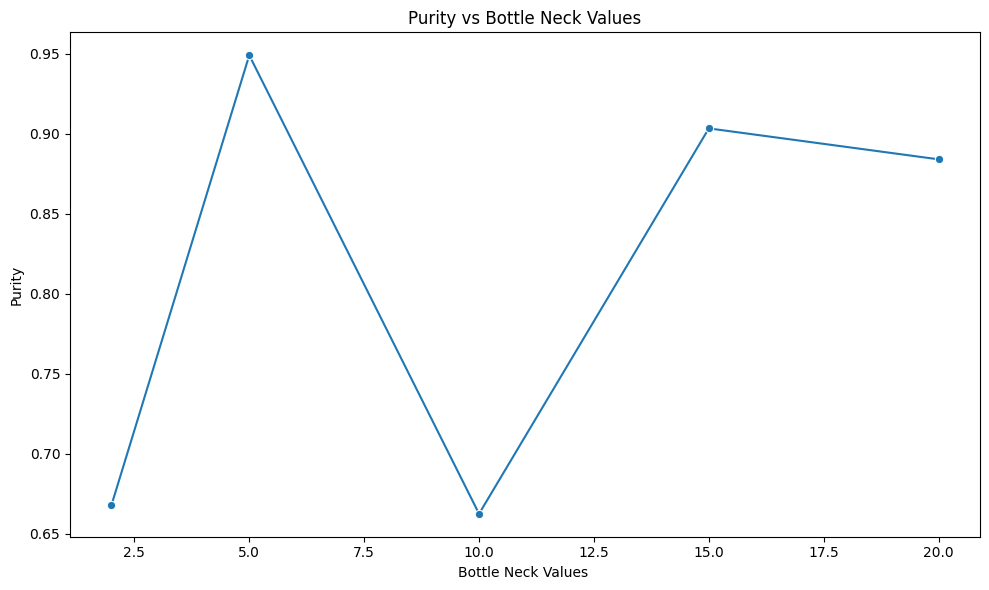

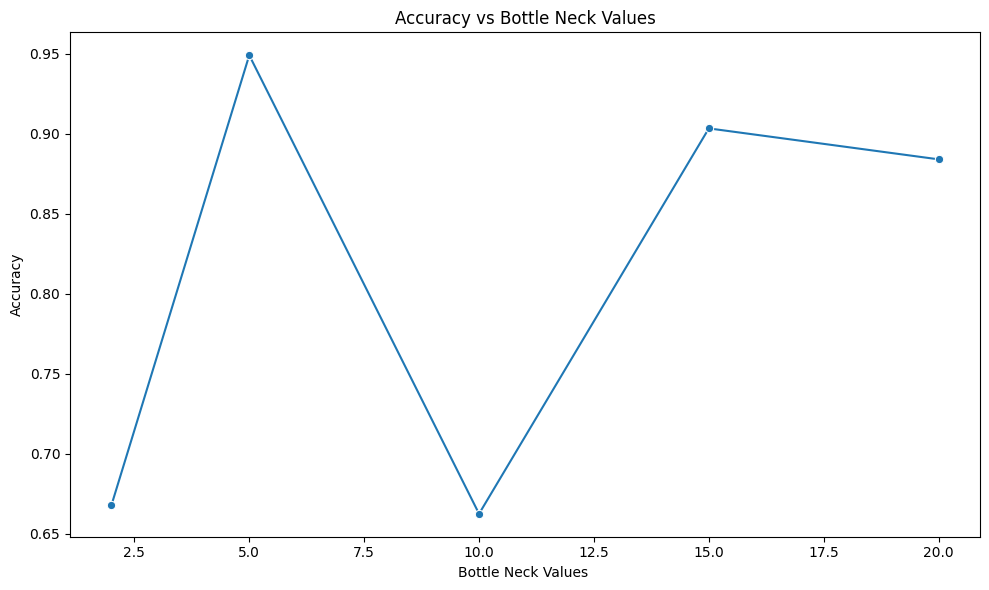

In [10]:
metrics_to_plot = [
 "ARI", "NMI", "Purity", "Accuracy"
]

for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))

    sns.lineplot(
        data=df_metrics,
        x="Bottle Neck Values",
        y=metric,
        marker="o"
    )

    plt.title(f"{metric} vs Bottle Neck Values")
    plt.xlabel("Bottle Neck Values ")
    plt.ylabel(metric)
    plt.tight_layout()
    plt.show()


Confusion Matrix for the best model

In [11]:
# confusion matrix: true labels vs clusters
cm = confusion_matrix(Y, mapped_clusters)


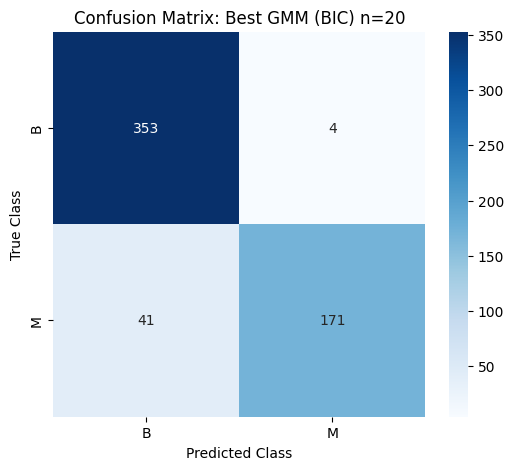

In [12]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(mapped_clusters),
            yticklabels=np.unique(Y))
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title(f"Confusion Matrix: Best GMM (BIC) n={best_val}")
plt.show()